# CUSTOMER BEHAVIOUR PREDICTION

### Libraries

In [1]:
import pandas as pd
import numpy as np
from textblob import TextBlob
import nltk
nltk.download('punkt')
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import string
from sklearn.feature_extraction.text import TfidfVectorizer
from IPython.display import HTML
from sklearn.model_selection import cross_val_score
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
def pretty_print_df(value_counts_):
  "Quick function to display value counts more nicely"
  display(HTML(pd.DataFrame(value_counts_).to_html()))

[nltk_data] Downloading package punkt to
[nltk_data]     /Users/ifeatuonuorah/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/ifeatuonuorah/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


### Data Loading and Exploration

In [2]:
df = pd.read_csv('amazon_reviews_us_Furniture_v1_00.csv')

/var/folders/fw/9g7vf43514l_4vfr5_830xjc0000gn/T/ipykernel_13994/3326168628.py:1: DtypeWarning: Columns (1,17,18,19,20,21) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('amazon_reviews_us_Furniture_v1_00.csv')


In [3]:
df

,marketplace,customer_id,review_id,product_id,product_parent,product_title,product_category,star_rating,helpful_votes,total_votes,...,review_headline,review_body,review_date,Unnamed: 15,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Unnamed: 21
0,US,24509695,R3VR960AHLFKDV,B004HB5E0E,488241329.0,Shoal Creek Computer Desk,Furniture,4.0,0.0,0.0,...,... desk is very study and it i has a beautifu...,This desk is very study and it i has a beauti...,31/08/2015,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,US,34731776,R16LGVMFKIUT0G,B0042TNMMS,205864445.0,Dorel Home Products Delaney Large Rectangular ...,Furniture,5.0,0.0,0.0,...,Five Stars,Great item,31/08/2015,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,US,1272331,R1AIMEEPYHMOE4,B0030MPBZ4,124663823.0,Bathroom Vanity Table Jewelry Makeup Desk Benc...,Furniture,5.0,1.0,1.0,...,Five Stars,"Perfect fit for my bedroom, been wanting one s...",31/08/2015,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,US,45284262,R1892CCSZWZ9SR,B005G02ESA,382367578.0,Sleep Master Ultima Comfort Memory Foam 6 Inch...,Furniture,3.0,0.0,0.0,...,Good enough,"We use this on a trundle bed. So, it does not...",31/08/2015,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,US,30003523,R285P679YWVKD1,B005JS8AUA,309497463.0,"1 1/4"" GashGuards: Deluxe Rubberized Plastic B...",Furniture,3.0,0.0,0.0,...,Gash Gards for daybed,The product is fine...just seemed like it took...,31/08/2015,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
791697,US,52940456,R1F7BNIK2R72ZC,B000050FF8,161996292.0,HoMedics BLTW-100 21-Inch AquaScape Twist Bubb...,Furniture,5.0,21.0,21.0,...,A great deal!,I sort of collect water fountains and most hav...,07/11/2000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
791698,US,50562473,RVR3U3QA0D95B,B00000K0CL,328789022.0,Midnight Motion Lamp with White Lava and Blue ...,Furniture,5.0,10.0,11.0,...,This Lava Lamp is great!,I just got my lava lamp 2 days ago and I just ...,28/10/2000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
791699,US,51137498,R1X5JB9UJRZW31,B00004SZ5M,547720134.0,Maglite Solitaire Incandescent 1-Cell AAA Flas...,Furniture,5.0,3.0,5.0,...,You can't go wrong owning one of these,"This is similar to other mag-lites, except in ...",16/07/2000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
791700,US,49843940,R235PHRTF7BFK7,B00004SBJJ,685482907.0,"Le Creuset Stoneware 1-Quart Crock, White",Furniture,4.0,5.0,5.0,...,Everybody can use a little Le Creuset,I purchased this little pot as a gift for a fr...,12/06/2000,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
need = ['star_rating', 'review_body','verified_purchase', 'helpful_votes', 'total_votes']
data = pd.read_csv('amazon_reviews_us_Furniture_v1_00.csv',usecols=lambda column: column in need)
df = data.head(100000).copy()

In [5]:
print(df.isnull().sum())

star_rating           0
helpful_votes         0
total_votes           0
verified_purchase     0
review_body          48
dtype: int64


In [6]:
df.dropna(inplace=True)

# Handling duplicate rows
df.drop_duplicates(inplace=True)

In [7]:
df

,star_rating,helpful_votes,total_votes,verified_purchase,review_body
0,4.0,0.0,0.0,Y,This desk is very study and it i has a beauti...
1,5.0,0.0,0.0,Y,Great item
2,5.0,1.0,1.0,Y,"Perfect fit for my bedroom, been wanting one s..."
3,3.0,0.0,0.0,Y,"We use this on a trundle bed. So, it does not..."
4,3.0,0.0,0.0,N,The product is fine...just seemed like it took...
...,...,...,...,...,...
99995,5.0,0.0,0.0,Y,This item arrived on the estimated date. It's ...
99996,5.0,0.0,0.0,Y,"Beautiful colors, I ordered three to put in a ..."
99997,5.0,0.0,0.0,Y,The boys have enjoyed these gifts. Thank you.
99998,5.0,0.0,0.0,Y,worked perfectly!!


In [8]:
# Clean text data (review_body)
def clean_text(text):
    # Remove punctuation
    text = text.translate(str.maketrans('', '', string.punctuation))
    # Convert to lowercase
    text = text.lower()
    # Tokenization
    tokens = word_tokenize(text)
    # Remove stopwords
    stop_words = set(stopwords.words('english'))
    filtered_tokens = [word for word in tokens if word not in stop_words]
    # Join tokens back into a single string
    cleaned_text = ' '.join(filtered_tokens)
    return cleaned_text

df['cleaned_review_body'] = df['review_body'].apply(clean_text)


In [9]:
df

,star_rating,helpful_votes,total_votes,verified_purchase,review_body,cleaned_review_body
0,4.0,0.0,0.0,Y,This desk is very study and it i has a beauti...,desk study beautiful finish think little price...
1,5.0,0.0,0.0,Y,Great item,great item
2,5.0,1.0,1.0,Y,"Perfect fit for my bedroom, been wanting one s...",perfect fit bedroom wanting one since little girl
3,3.0,0.0,0.0,Y,"We use this on a trundle bed. So, it does not...",use trundle bed get much use much better choic...
4,3.0,0.0,0.0,N,The product is fine...just seemed like it took...,product finejust seemed like took awhile mail ...
...,...,...,...,...,...,...
99995,5.0,0.0,0.0,Y,This item arrived on the estimated date. It's ...,item arrived estimated date pretty big believe...
99996,5.0,0.0,0.0,Y,"Beautiful colors, I ordered three to put in a ...",beautiful colors ordered three put kitchen woo...
99997,5.0,0.0,0.0,Y,The boys have enjoyed these gifts. Thank you.,boys enjoyed gifts thank
99998,5.0,0.0,0.0,Y,worked perfectly!!,worked perfectly


In [10]:
# Perform sentiment analysis using TextBlob
def get_sentiment(text):
    analysis = TextBlob(text)
    polarity = analysis.sentiment.polarity  # Sentiment polarity score [-1.0, 1.0]
    if polarity > 0:
        sentiment = 'positive'
    elif polarity < 0:
        sentiment = 'negative'
    else:
        sentiment = 'neutral'
    return sentiment, polarity

# Apply sentiment analysis to cleaned review body
df['sentiment'], df['polarity_score'] = zip(*df['cleaned_review_body'].apply(get_sentiment))

# Data Exploration
# Display a sample of the updated DataFrame including sentiment and polarity score
print("Sample of the Updated DataFrame:")
print(df[['review_body', 'cleaned_review_body', 'sentiment', 'polarity_score']].head(30))  # Display sample rows


Sample of the Updated DataFrame:
                                          review_body  \
0   This desk is very study and it i has  a beauti...   
1                                          Great item   
2   Perfect fit for my bedroom, been wanting one s...   
3   We use this on a trundle bed.  So, it does not...   
4   The product is fine...just seemed like it took...   
5      Love this product, amazing delivery, thank you   
6   I love this bench, had one in Black for over f...   
7   Have had this for over a year.  Very well made...   
8   This is the best step stool I have ever used. ...   
9                                    my son loves it!   
10                                      Great product   
11  bought with sleep contour 8&#34; foam. arrived...   
12  Delivery was on time. I was very satisfied wit...   
13  Exactly as pictured. Plush, soft and great for...   
14  Beautiful table.  It's good quality and heavy....   
15  I have cleaned up the last mess from using thi...  

In [11]:
df

,star_rating,helpful_votes,total_votes,verified_purchase,review_body,cleaned_review_body,sentiment,polarity_score
0,4.0,0.0,0.0,Y,This desk is very study and it i has a beauti...,desk study beautiful finish think little price...,positive,0.331250
1,5.0,0.0,0.0,Y,Great item,great item,positive,0.800000
2,5.0,1.0,1.0,Y,"Perfect fit for my bedroom, been wanting one s...",perfect fit bedroom wanting one since little girl,positive,0.404167
3,3.0,0.0,0.0,Y,"We use this on a trundle bed. So, it does not...",use trundle bed get much use much better choic...,positive,0.233333
4,3.0,0.0,0.0,N,The product is fine...just seemed like it took...,product finejust seemed like took awhile mail ...,negative,-0.116667
...,...,...,...,...,...,...,...,...
99995,5.0,0.0,0.0,Y,This item arrived on the estimated date. It's ...,item arrived estimated date pretty big believe...,positive,0.350000
99996,5.0,0.0,0.0,Y,"Beautiful colors, I ordered three to put in a ...",beautiful colors ordered three put kitchen woo...,positive,0.816667
99997,5.0,0.0,0.0,Y,The boys have enjoyed these gifts. Thank you.,boys enjoyed gifts thank,positive,0.500000
99998,5.0,0.0,0.0,Y,worked perfectly!!,worked perfectly,positive,1.000000


sentiment
positive    80587
negative     9613
neutral      6074
Name: count, dtype: int64


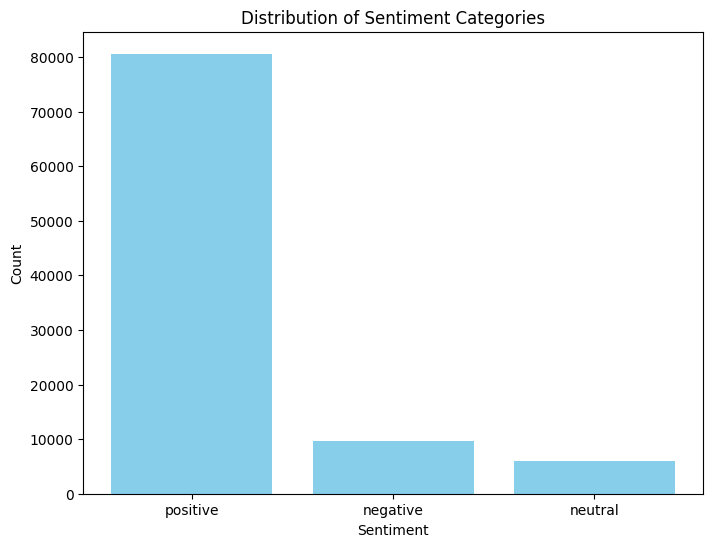

In [12]:
print(df['sentiment'].value_counts())  # Count occurrences of each sentiment category

# Visualize distribution of sentiment categories
import matplotlib.pyplot as plt

sentiment_counts = df['sentiment'].value_counts()
plt.figure(figsize=(8, 6))
plt.bar(sentiment_counts.index, sentiment_counts.values, color='skyblue')
plt.title('Distribution of Sentiment Categories')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.show()


Descriptive Statistics for Numeric Columns:
        star_rating  helpful_votes   total_votes  polarity_score
count  96274.000000   96274.000000  96274.000000    96274.000000
mean       4.125247       1.732129      2.005277        0.309351
std        1.293546      12.399560     13.078011        0.293943
min        1.000000       0.000000      0.000000       -1.000000
25%        4.000000       0.000000      0.000000        0.112500
50%        5.000000       0.000000      0.000000        0.300000
75%        5.000000       1.000000      1.000000        0.500000
max        5.000000    1530.000000   1545.000000        1.000000


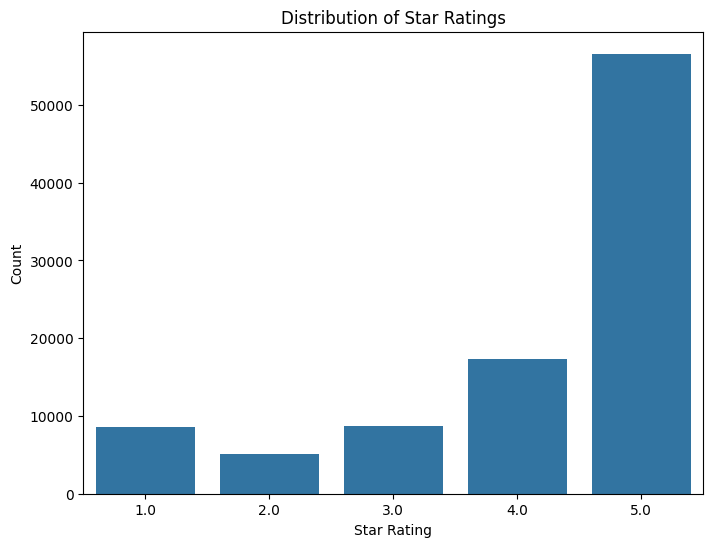

In [13]:
# Explore descriptive statistics for numeric columns
print("\nDescriptive Statistics for Numeric Columns:")
print(df.describe())  # Display summary statistics for all numeric columns

# Visualize the distribution of star ratings
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, 6))
sns.countplot(x='star_rating', data=df)
plt.title('Distribution of Star Ratings')
plt.xlabel('Star Rating')
plt.ylabel('Count')
plt.show()

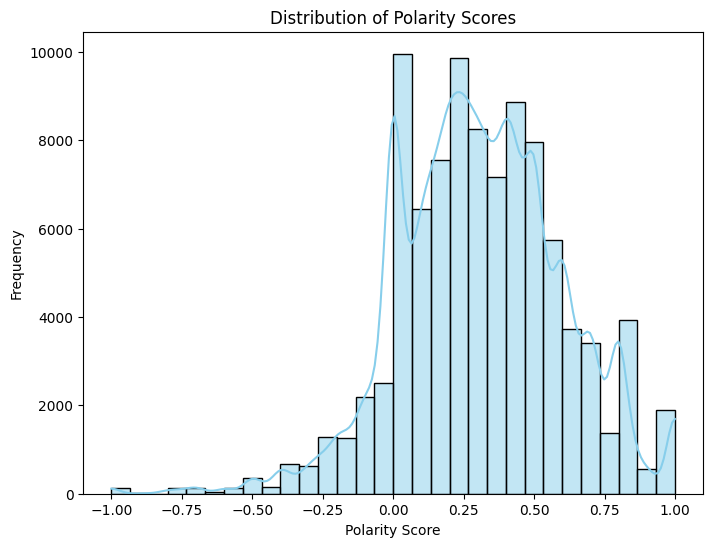

In [14]:
plt.figure(figsize=(8, 6))
sns.histplot(df['polarity_score'], bins=30, kde=True, color='skyblue', edgecolor='black')
plt.title('Distribution of Polarity Scores')
plt.xlabel('Polarity Score')
plt.ylabel('Frequency')
plt.show()

In [15]:
# Feature Engineering
#Calculate length of reviews (number of words)
# df['review_length_words'] = df['cleaned_review_body'].apply(lambda x: len(x.split()))  # Word count

# Convert 'verified_purchase' to binary feature (is_verified)
df['is_verified'] = df['verified_purchase'].apply(lambda x: 1 if x == 'Y' else 0)



In [16]:
df

,star_rating,helpful_votes,total_votes,verified_purchase,review_body,cleaned_review_body,sentiment,polarity_score,is_verified
0,4.0,0.0,0.0,Y,This desk is very study and it i has a beauti...,desk study beautiful finish think little price...,positive,0.331250,1
1,5.0,0.0,0.0,Y,Great item,great item,positive,0.800000,1
2,5.0,1.0,1.0,Y,"Perfect fit for my bedroom, been wanting one s...",perfect fit bedroom wanting one since little girl,positive,0.404167,1
3,3.0,0.0,0.0,Y,"We use this on a trundle bed. So, it does not...",use trundle bed get much use much better choic...,positive,0.233333,1
4,3.0,0.0,0.0,N,The product is fine...just seemed like it took...,product finejust seemed like took awhile mail ...,negative,-0.116667,0
...,...,...,...,...,...,...,...,...,...
99995,5.0,0.0,0.0,Y,This item arrived on the estimated date. It's ...,item arrived estimated date pretty big believe...,positive,0.350000,1
99996,5.0,0.0,0.0,Y,"Beautiful colors, I ordered three to put in a ...",beautiful colors ordered three put kitchen woo...,positive,0.816667,1
99997,5.0,0.0,0.0,Y,The boys have enjoyed these gifts. Thank you.,boys enjoyed gifts thank,positive,0.500000,1
99998,5.0,0.0,0.0,Y,worked perfectly!!,worked perfectly,positive,1.000000,1


In [17]:
#Calculate length of reviews (number of words)
df['review_length_words'] = df['cleaned_review_body'].apply(lambda x: len(x.split()))  # Word count

In [18]:
df

,star_rating,helpful_votes,total_votes,verified_purchase,review_body,cleaned_review_body,sentiment,polarity_score,is_verified,review_length_words
0,4.0,0.0,0.0,Y,This desk is very study and it i has a beauti...,desk study beautiful finish think little price...,positive,0.331250,1,8
1,5.0,0.0,0.0,Y,Great item,great item,positive,0.800000,1,2
2,5.0,1.0,1.0,Y,"Perfect fit for my bedroom, been wanting one s...",perfect fit bedroom wanting one since little girl,positive,0.404167,1,8
3,3.0,0.0,0.0,Y,"We use this on a trundle bed. So, it does not...",use trundle bed get much use much better choic...,positive,0.233333,1,20
4,3.0,0.0,0.0,N,The product is fine...just seemed like it took...,product finejust seemed like took awhile mail ...,negative,-0.116667,0,16
...,...,...,...,...,...,...,...,...,...,...
99995,5.0,0.0,0.0,Y,This item arrived on the estimated date. It's ...,item arrived estimated date pretty big believe...,positive,0.350000,1,17
99996,5.0,0.0,0.0,Y,"Beautiful colors, I ordered three to put in a ...",beautiful colors ordered three put kitchen woo...,positive,0.816667,1,18
99997,5.0,0.0,0.0,Y,The boys have enjoyed these gifts. Thank you.,boys enjoyed gifts thank,positive,0.500000,1,4
99998,5.0,0.0,0.0,Y,worked perfectly!!,worked perfectly,positive,1.000000,1,2


### Data Preprocessing and Split

In [19]:
# # Extract key phrases or topics from reviews using TF-IDF vectorization
# # Initialize TF-IDF vectorizer
tfidf_vectorizer = TfidfVectorizer(max_features=80,  # Maximum number of features (top 1000 frequent terms)
                                 stop_words='english',  # Remove English stopwords
                                   ngram_range=(1, 2))  # Include unigrams and bigrams

# # Fit and transform the TF-IDF vectorizer on 'cleaned_review_body'
tfidf_matrix = tfidf_vectorizer.fit_transform(df['cleaned_review_body'])

In [20]:
feature_names = tfidf_vectorizer.get_feature_names_out()

In [21]:
# Convert TF-IDF matrix to DataFrame and concatenate with original DataFrame
tfidf_df = pd.DataFrame(tfidf_matrix.toarray(), columns=feature_names)
df1 = pd.concat([df, tfidf_df], axis=1)

# # Display the updated DataFrame with additional features
print("Updated DataFrame with Additional Features:")
print(df1)  # Display sample rows with new features

Updated DataFrame with Additional Features:
       star_rating  helpful_votes  total_votes verified_purchase  \
0              4.0            0.0          0.0                 Y   
1              5.0            0.0          0.0                 Y   
2              5.0            1.0          1.0                 Y   
3              3.0            0.0          0.0                 Y   
4              3.0            0.0          0.0                 N   
...            ...            ...          ...               ...   
96126          NaN            NaN          NaN               NaN   
96146          NaN            NaN          NaN               NaN   
96152          NaN            NaN          NaN               NaN   
96161          NaN            NaN          NaN               NaN   
96269          NaN            NaN          NaN               NaN   

                                             review_body  \
0      This desk is very study and it i has  a beauti...   
1                  

In [22]:
df1

,star_rating,helpful_votes,total_votes,verified_purchase,review_body,cleaned_review_body,sentiment,polarity_score,is_verified,review_length_words,...,table,thing,time,took,use,used,way,wood,work,works
0,4.0,0.0,0.0,Y,This desk is very study and it i has a beauti...,desk study beautiful finish think little price...,positive,0.331250,1.0,8.0,...,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.000000
1,5.0,0.0,0.0,Y,Great item,great item,positive,0.800000,1.0,2.0,...,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.000000
2,5.0,1.0,1.0,Y,"Perfect fit for my bedroom, been wanting one s...",perfect fit bedroom wanting one since little girl,positive,0.404167,1.0,8.0,...,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.000000
3,3.0,0.0,0.0,Y,"We use this on a trundle bed. So, it does not...",use trundle bed get much use much better choic...,positive,0.233333,1.0,20.0,...,0.000000,0.0,0.0,0.000000,0.833632,0.0,0.0,0.000000,0.0,0.000000
4,3.0,0.0,0.0,N,The product is fine...just seemed like it took...,product finejust seemed like took awhile mail ...,negative,-0.116667,0.0,16.0,...,0.000000,0.0,0.0,0.549994,0.000000,0.0,0.0,0.000000,0.0,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96126,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.541506,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.000000
96146,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0,0.497313,0.0,0.000000
96152,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.000000
96161,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.668435


In [23]:
print(df1.isnull().sum())

star_rating          3575
helpful_votes        3575
total_votes          3575
verified_purchase    3575
review_body          3575
                     ... 
used                 3575
way                  3575
wood                 3575
work                 3575
works                3575
Length: 90, dtype: int64


In [24]:
df1.dropna(inplace=True)

# Handling duplicate rows
df1.drop_duplicates(inplace=True)

In [25]:
print(df1.isnull().sum())

star_rating          0
helpful_votes        0
total_votes          0
verified_purchase    0
review_body          0
                    ..
used                 0
way                  0
wood                 0
work                 0
works                0
Length: 90, dtype: int64


In [26]:
df1

,star_rating,helpful_votes,total_votes,verified_purchase,review_body,cleaned_review_body,sentiment,polarity_score,is_verified,review_length_words,...,table,thing,time,took,use,used,way,wood,work,works
0,4.0,0.0,0.0,Y,This desk is very study and it i has a beauti...,desk study beautiful finish think little price...,positive,0.331250,1.0,8.0,...,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0000,0.000000,0.000000
1,5.0,0.0,0.0,Y,Great item,great item,positive,0.800000,1.0,2.0,...,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0000,0.000000,0.000000
2,5.0,1.0,1.0,Y,"Perfect fit for my bedroom, been wanting one s...",perfect fit bedroom wanting one since little girl,positive,0.404167,1.0,8.0,...,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0000,0.000000,0.000000
3,3.0,0.0,0.0,Y,"We use this on a trundle bed. So, it does not...",use trundle bed get much use much better choic...,positive,0.233333,1.0,20.0,...,0.0,0.0,0.0,0.000000,0.833632,0.0,0.0,0.0000,0.000000,0.000000
4,3.0,0.0,0.0,N,The product is fine...just seemed like it took...,product finejust seemed like took awhile mail ...,negative,-0.116667,0.0,16.0,...,0.0,0.0,0.0,0.549994,0.000000,0.0,0.0,0.0000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96268,5.0,0.0,0.0,Y,We now have two of these - very comfortable! ...,two comfortable embarrassed put guests,positive,0.400000,1.0,5.0,...,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0000,0.000000,0.610095
96270,5.0,0.0,0.0,Y,arrived as described. very easy to put togeth...,arrived described easy put together job intend...,positive,0.433333,1.0,10.0,...,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.5279,0.556222,0.000000
96271,5.0,0.0,0.0,Y,good!!!,good,positive,0.700000,1.0,1.0,...,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0000,0.000000,0.000000
96272,2.0,3.0,3.0,Y,It seems nice enough but the ship it folded up...,seems nice enough ship folded comes bent worse...,negative,-0.002381,1.0,20.0,...,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0000,0.000000,0.000000


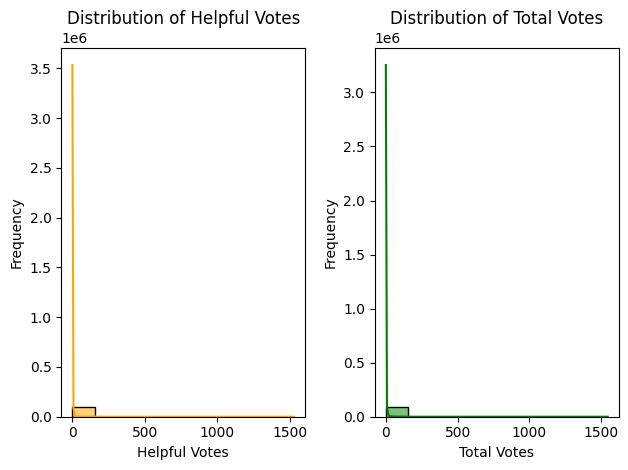

In [27]:
#Histogram for helpful_votes
plt.subplot(1, 2, 1)
sns.histplot(df1['helpful_votes'], bins=10, kde=True, color='orange', edgecolor='black')
plt.title('Distribution of Helpful Votes')
plt.xlabel('Helpful Votes')
plt.ylabel('Frequency')

# Histogram for total_votes
plt.subplot(1, 2, 2)
sns.histplot(df1['total_votes'], bins=10, kde=True, color='green', edgecolor='black')
plt.title('Distribution of Total Votes')
plt.xlabel('Total Votes')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

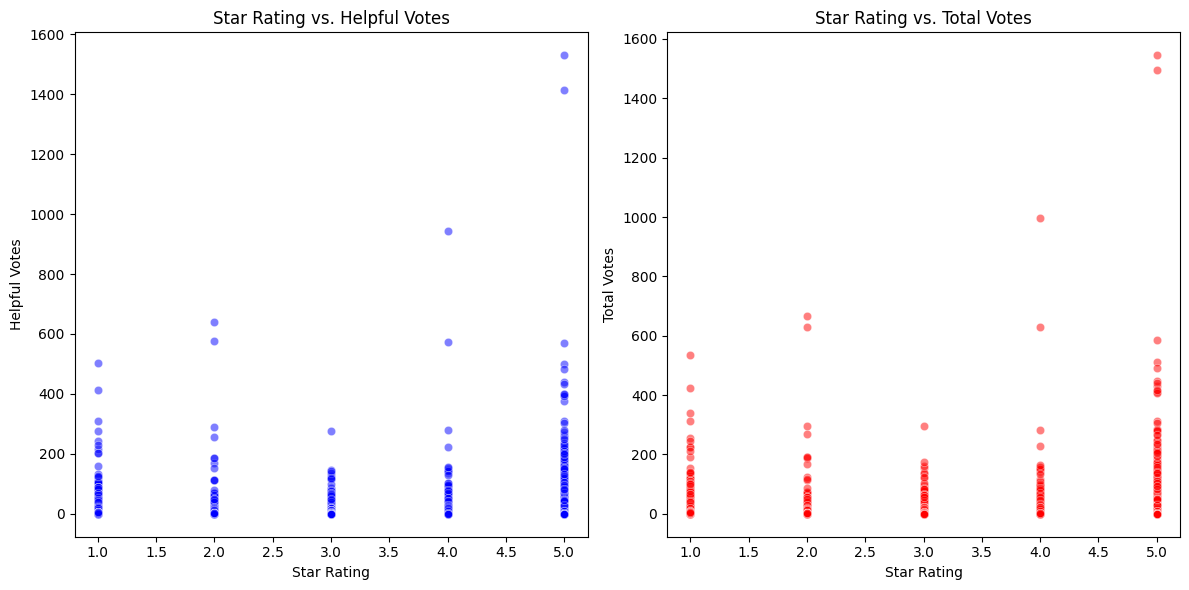

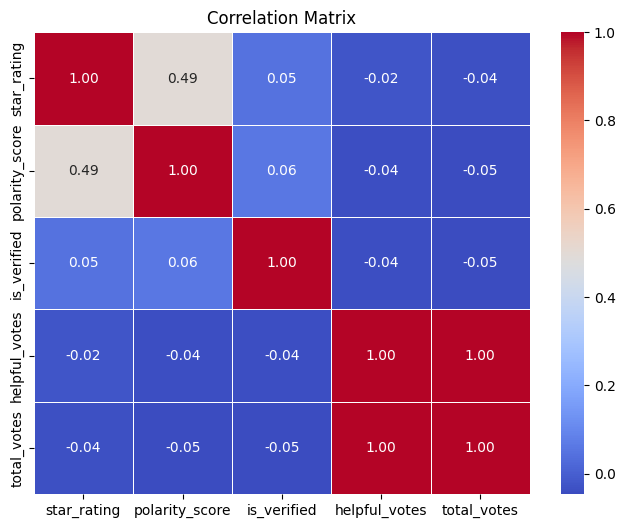

In [28]:
# Analyze relationships between features using scatter plots and correlations
plt.figure(figsize=(12, 6))

# Scatter plot: star_rating vs. helpful_votes
plt.subplot(1, 2, 1)
sns.scatterplot(x='star_rating', y='helpful_votes', data=df1, color='blue', alpha=0.5)
plt.title('Star Rating vs. Helpful Votes')
plt.xlabel('Star Rating')
plt.ylabel('Helpful Votes')

# Scatter plot: star_rating vs. total_votes
plt.subplot(1, 2, 2)
sns.scatterplot(x='star_rating', y='total_votes', data=df1, color='red', alpha=0.5)
plt.title('Star Rating vs. Total Votes')
plt.xlabel('Star Rating')
plt.ylabel('Total Votes')

plt.tight_layout()
plt.show()

# Calculate correlations between features
correlation_matrix = df1[['star_rating','polarity_score','is_verified', 'helpful_votes', 'total_votes']].corr()

# Display correlation matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

In [29]:
df1.drop(columns=['cleaned_review_body', 'verified_purchase','review_body'], inplace=True)

In [30]:
df1

,star_rating,helpful_votes,total_votes,sentiment,polarity_score,is_verified,review_length_words,arrived,assemble,assembly,...,table,thing,time,took,use,used,way,wood,work,works
0,4.0,0.0,0.0,positive,0.331250,1.0,8.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0000,0.000000,0.000000
1,5.0,0.0,0.0,positive,0.800000,1.0,2.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0000,0.000000,0.000000
2,5.0,1.0,1.0,positive,0.404167,1.0,8.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0000,0.000000,0.000000
3,3.0,0.0,0.0,positive,0.233333,1.0,20.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.833632,0.0,0.0,0.0000,0.000000,0.000000
4,3.0,0.0,0.0,negative,-0.116667,0.0,16.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.549994,0.000000,0.0,0.0,0.0000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96268,5.0,0.0,0.0,positive,0.400000,1.0,5.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0000,0.000000,0.610095
96270,5.0,0.0,0.0,positive,0.433333,1.0,10.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.5279,0.556222,0.000000
96271,5.0,0.0,0.0,positive,0.700000,1.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0000,0.000000,0.000000
96272,2.0,3.0,3.0,negative,-0.002381,1.0,20.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0000,0.000000,0.000000


In [31]:
target_column = 'sentiment'

# Assuming 'df' is your DataFrame
X = df1.drop(target_column, axis=1)  # Features (remove the target column)
y = df1[target_column]  # Labels (only the target column)

# Display the shapes of X and y
print("Shape of X:", X.shape)
print("Shape of y:", y.shape)

Shape of X: (92699, 86)
Shape of y: (92699,)


In [32]:
X

,star_rating,helpful_votes,total_votes,polarity_score,is_verified,review_length_words,arrived,assemble,assembly,beautiful,...,table,thing,time,took,use,used,way,wood,work,works
0,4.0,0.0,0.0,0.331250,1.0,8.0,0.0,0.0,0.0,0.497051,...,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0000,0.000000,0.000000
1,5.0,0.0,0.0,0.800000,1.0,2.0,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0000,0.000000,0.000000
2,5.0,1.0,1.0,0.404167,1.0,8.0,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0000,0.000000,0.000000
3,3.0,0.0,0.0,0.233333,1.0,20.0,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.000000,0.833632,0.0,0.0,0.0000,0.000000,0.000000
4,3.0,0.0,0.0,-0.116667,0.0,16.0,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.549994,0.000000,0.0,0.0,0.0000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96268,5.0,0.0,0.0,0.400000,1.0,5.0,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0000,0.000000,0.610095
96270,5.0,0.0,0.0,0.433333,1.0,10.0,0.0,0.0,0.0,0.507118,...,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.5279,0.556222,0.000000
96271,5.0,0.0,0.0,0.700000,1.0,1.0,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0000,0.000000,0.000000
96272,2.0,3.0,3.0,-0.002381,1.0,20.0,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0000,0.000000,0.000000


In [33]:
y

0        positive
1        positive
2        positive
3        positive
4        negative
           ...   
96268    positive
96270    positive
96271    positive
96272    negative
96273    positive
Name: sentiment, Length: 92699, dtype: object

In [34]:
numerical_cols = X.select_dtypes(include=['number']).columns.tolist()
categorical_cols = X.select_dtypes(exclude=['number']).columns.tolist()

# Create separate DataFrames for numerical and categorical variables
X_numerical = X[numerical_cols]
X_categorical = X[categorical_cols]

# Display information about numerical and categorical variables
print("Numerical Variables:")
print(X_numerical.head())

print("\nCategorical Variables:")
print(X_categorical.head())

Numerical Variables:
   star_rating  helpful_votes  total_votes  polarity_score  is_verified  \
0          4.0            0.0          0.0        0.331250          1.0   
1          5.0            0.0          0.0        0.800000          1.0   
2          5.0            1.0          1.0        0.404167          1.0   
3          3.0            0.0          0.0        0.233333          1.0   
4          3.0            0.0          0.0       -0.116667          0.0   

   review_length_words  arrived  assemble  assembly  beautiful  ...  table  \
0                  8.0      0.0       0.0       0.0   0.497051  ...    0.0   
1                  2.0      0.0       0.0       0.0   0.000000  ...    0.0   
2                  8.0      0.0       0.0       0.0   0.000000  ...    0.0   
3                 20.0      0.0       0.0       0.0   0.000000  ...    0.0   
4                 16.0      0.0       0.0       0.0   0.000000  ...    0.0   

   thing  time      took       use  used  way  wood  work  

In [35]:
X.describe()

,star_rating,helpful_votes,total_votes,polarity_score,is_verified,review_length_words,arrived,assemble,assembly,beautiful,...,table,thing,time,took,use,used,way,wood,work,works
count,92699.000000,92699.000000,92699.000000,92699.000000,92699.000000,92699.000000,92699.000000,92699.000000,92699.000000,92699.000000,...,92699.000000,92699.000000,92699.000000,92699.000000,92699.000000,92699.000000,92699.000000,92699.00000,92699.000000,92699.000000
mean,4.123637,1.747689,2.020798,0.309156,0.950647,21.316735,0.018231,0.026700,0.015317,0.026439,...,0.029768,0.011409,0.023501,0.015610,0.026644,0.013076,0.014073,0.01791,0.014511,0.020159
std,1.294571,12.593314,13.272288,0.294185,0.216606,33.357791,0.094973,0.103098,0.083310,0.123073,...,0.127372,0.072561,0.098902,0.079244,0.109997,0.077836,0.079773,0.09224,0.085165,0.109180
min,1.000000,0.000000,0.000000,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
25%,4.000000,0.000000,0.000000,0.112500,1.000000,6.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
50%,5.000000,0.000000,0.000000,0.300000,1.000000,12.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
75%,5.000000,1.000000,1.000000,0.500000,1.000000,25.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
max,5.000000,1530.000000,1545.000000,1.000000,1.000000,1914.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000


In [36]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test= train_test_split(X, y, test_size=0.3, random_state=42)

In [37]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

# Fit the scaler to your data and transform it
X_scaled = scaler.fit_transform(X_train)

In [38]:
X_scaled_test = scaler.transform(X_test)

In [39]:
X_scaled_column = scaler.get_feature_names_out()
X_train= pd.DataFrame(X_scaled, columns=X_scaled_column)

In [40]:
X_test = pd.DataFrame(X_scaled_test, columns=X_scaled_column)

In [41]:
X_train

,star_rating,helpful_votes,total_votes,polarity_score,is_verified,review_length_words,arrived,assemble,assembly,beautiful,...,table,thing,time,took,use,used,way,wood,work,works
0,1.00,0.002123,0.003015,0.732500,1.0,0.014107,0.0,0.0,0.000000,0.0,...,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000
1,0.50,0.003185,0.003015,0.656250,1.0,0.007837,0.0,0.0,0.000000,0.0,...,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000
2,1.00,0.001062,0.001005,0.660119,1.0,0.052247,0.0,0.0,0.330282,0.0,...,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000
3,0.25,0.001062,0.003015,0.708333,1.0,0.005747,0.0,0.0,0.000000,0.0,...,0.625907,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000
4,0.75,0.000000,0.000000,0.825000,1.0,0.015674,0.0,0.0,0.000000,0.0,...,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
64884,0.75,0.000000,0.000000,0.687500,1.0,0.005747,0.0,0.0,0.000000,0.0,...,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000
64885,1.00,0.000000,0.000000,1.000000,1.0,0.002612,0.0,0.0,0.000000,0.0,...,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000
64886,0.75,0.001062,0.001005,0.500000,1.0,0.000522,1.0,0.0,0.000000,0.0,...,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000
64887,0.75,0.001062,0.001005,0.588281,1.0,0.018286,0.0,0.0,0.000000,0.0,...,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000


In [42]:
X_test

,star_rating,helpful_votes,total_votes,polarity_score,is_verified,review_length_words,arrived,assemble,assembly,beautiful,...,table,thing,time,took,use,used,way,wood,work,works
0,1.00,0.000000,0.000000,0.829167,1.0,0.008359,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,1.0,0.000000
1,1.00,0.007431,0.007035,0.644444,1.0,0.012539,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000
2,1.00,0.005308,0.005025,0.687500,1.0,0.009404,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.211006,0.0,0.0,0.0,0.242915,0.0,0.0,0.000000
3,0.75,0.000000,0.000000,0.509396,1.0,0.013062,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000
4,1.00,0.000000,0.000000,0.683333,1.0,0.007837,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27805,1.00,0.001062,0.002010,0.733333,1.0,0.002090,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000
27806,1.00,0.000000,0.000000,0.693750,1.0,0.010972,1.0,0.000000,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000
27807,0.75,0.001062,0.001005,0.383333,1.0,0.011494,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000
27808,1.00,0.000000,0.001005,0.550000,1.0,0.002612,0.0,0.433478,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000


In [43]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
y_train = label_encoder.fit_transform(y_train)
y_test = label_encoder.transform(y_test)

In [44]:
y_test

array([2, 2, 2, ..., 0, 2, 2])

In [45]:
y_train

array([2, 2, 2, ..., 1, 2, 2])

### XGBoost Model

In [46]:
from sklearn.metrics import classification_report
import xgboost as xgb

clf = xgb.XGBClassifier(objective='multi:softmax',  # Multiclass classification
                        num_class=3,  # Number of classes (positive, negative, neutral)
                        eval_metric='mlogloss')  # Evaluation metric for multiclass

# Train the XGBoost classifier on the TF-IDF features
clf.fit(X_train, y_train)

# Predict sentiment labels for test data
y_pred = clf.predict(X_test)


# Evaluate the model's performance
print("Classification Report:")
print(classification_report(y_test, y_pred))



Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2802
           1       0.98      0.99      0.99      1702
           2       1.00      1.00      1.00     23306

    accuracy                           1.00     27810
   macro avg       0.99      1.00      0.99     27810
weighted avg       1.00      1.00      1.00     27810



In [47]:
import joblib
joblib.dump(clf, 'clf_model.pk1')

['clf_model.pk1']

## Cross Validation and Purchase Intent Label

In [48]:
df['Purchase_intent'] = (df['star_rating'] > 3).astype(int)
df.drop('star_rating', axis=1, inplace=True)

In [49]:
df

,helpful_votes,total_votes,verified_purchase,review_body,cleaned_review_body,sentiment,polarity_score,is_verified,review_length_words,Purchase_intent
0,0.0,0.0,Y,This desk is very study and it i has a beauti...,desk study beautiful finish think little price...,positive,0.331250,1,8,1
1,0.0,0.0,Y,Great item,great item,positive,0.800000,1,2,1
2,1.0,1.0,Y,"Perfect fit for my bedroom, been wanting one s...",perfect fit bedroom wanting one since little girl,positive,0.404167,1,8,1
3,0.0,0.0,Y,"We use this on a trundle bed. So, it does not...",use trundle bed get much use much better choic...,positive,0.233333,1,20,0
4,0.0,0.0,N,The product is fine...just seemed like it took...,product finejust seemed like took awhile mail ...,negative,-0.116667,0,16,0
...,...,...,...,...,...,...,...,...,...,...
99995,0.0,0.0,Y,This item arrived on the estimated date. It's ...,item arrived estimated date pretty big believe...,positive,0.350000,1,17,1
99996,0.0,0.0,Y,"Beautiful colors, I ordered three to put in a ...",beautiful colors ordered three put kitchen woo...,positive,0.816667,1,18,1
99997,0.0,0.0,Y,The boys have enjoyed these gifts. Thank you.,boys enjoyed gifts thank,positive,0.500000,1,4,1
99998,0.0,0.0,Y,worked perfectly!!,worked perfectly,positive,1.000000,1,2,1


In [50]:
df.drop(columns=['review_body', 'verified_purchase','sentiment'], inplace=True)

In [51]:
df

,helpful_votes,total_votes,cleaned_review_body,polarity_score,is_verified,review_length_words,Purchase_intent
0,0.0,0.0,desk study beautiful finish think little price...,0.331250,1,8,1
1,0.0,0.0,great item,0.800000,1,2,1
2,1.0,1.0,perfect fit bedroom wanting one since little girl,0.404167,1,8,1
3,0.0,0.0,use trundle bed get much use much better choic...,0.233333,1,20,0
4,0.0,0.0,product finejust seemed like took awhile mail ...,-0.116667,0,16,0
...,...,...,...,...,...,...,...
99995,0.0,0.0,item arrived estimated date pretty big believe...,0.350000,1,17,1
99996,0.0,0.0,beautiful colors ordered three put kitchen woo...,0.816667,1,18,1
99997,0.0,0.0,boys enjoyed gifts thank,0.500000,1,4,1
99998,0.0,0.0,worked perfectly,1.000000,1,2,1


In [52]:
# Example DataFrame 'df' containing cleaned review text and other features
X_text = df['cleaned_review_body']  # Textual feature (cleaned review text)
X_other = df[['helpful_votes', 'total_votes', 'is_verified', 'polarity_score', 'review_length_words']]  # Other numerical or categorical features

# Concatenate text and other features into a single DataFrame
X = pd.concat([X_text, X_other], axis=1)

# Target variable (purchase intent label)
y = df['Purchase_intent']

In [53]:
X

,cleaned_review_body,helpful_votes,total_votes,is_verified,polarity_score,review_length_words
0,desk study beautiful finish think little price...,0.0,0.0,1,0.331250,8
1,great item,0.0,0.0,1,0.800000,2
2,perfect fit bedroom wanting one since little girl,1.0,1.0,1,0.404167,8
3,use trundle bed get much use much better choic...,0.0,0.0,1,0.233333,20
4,product finejust seemed like took awhile mail ...,0.0,0.0,0,-0.116667,16
...,...,...,...,...,...,...
99995,item arrived estimated date pretty big believe...,0.0,0.0,1,0.350000,17
99996,beautiful colors ordered three put kitchen woo...,0.0,0.0,1,0.816667,18
99997,boys enjoyed gifts thank,0.0,0.0,1,0.500000,4
99998,worked perfectly,0.0,0.0,1,1.000000,2


In [54]:
y

0        1
1        1
2        1
3        0
4        0
        ..
99995    1
99996    1
99997    1
99998    1
99999    1
Name: Purchase_intent, Length: 96274, dtype: int64

In [55]:
# Define preprocessing steps for text and other features (if needed)
text_transformer = TfidfVectorizer()
other_transformer = StandardScaler()

# Create a ColumnTransformer to apply different transformations to text and other features
preprocessor = ColumnTransformer([
    ('text', text_transformer, 'cleaned_review_body'),  # Apply TfidfVectorizer to text column
    ('other', other_transformer, ['helpful_votes', 'total_votes', 'is_verified', 'polarity_score', 'review_length_words'])  # Apply StandardScaler to other features
])

preprocessor_pipeline = Pipeline([
    ('preprocessor', preprocessor)  # Preprocess text and other features
])

In [56]:
# Create a classifier for model training
clf1 = LogisticRegression(max_iter = 1000)

# Create a model training pipeline (including preprocessing)
model_pipeline = Pipeline([
    ('preprocessor', preprocessor),  # Preprocess text and other features
    ('clf1', clf1)  # Classifier (LogisticRegression) for model training
])

In [57]:
# Perform cross-validation with combined features
cv_scores = cross_val_score(model_pipeline, X, y, cv=5, scoring='accuracy')

# Print cross-validation scores
print("Cross-Validation Scores:", cv_scores)
print("Mean Accuracy:", cv_scores.mean())

Cross-Validation Scores: [0.89545573 0.89727344 0.89545573 0.89410543 0.89326893]
Mean Accuracy: 0.8951118490670593


In [58]:
joblib.dump(model_pipeline , 'model.pk1')

['model.pk1']

## Testing new Dataset

In [59]:
test_data= pd.read_csv('amazon_reviews_us_Gift_Card_v1_00.csv')
test_data

/var/folders/fw/9g7vf43514l_4vfr5_830xjc0000gn/T/ipykernel_13994/630224377.py:1: DtypeWarning: Columns (4,7,8) have mixed types. Specify dtype option on import or set low_memory=False.
  test_data= pd.read_csv('amazon_reviews_us_Gift_Card_v1_00.csv')


,marketplace,customer_id,review_id,product_id,product_parent,product_title,product_category,star_rating,helpful_votes,total_votes,vine,verified_purchase,review_headline,review_body,review_date
0,US,24371595,R27ZP1F1CD0C3Y,B004LLIL5A,346014806,Amazon eGift Card - Celebrate,Gift Card,5,0,0.0,N,Y,Five Stars,Great birthday gift for a young adult.,31/08/2015
1,US,42489718,RJ7RSBCHUDNNE,B004LLIKVU,473048287,Amazon.com eGift Cards,Gift Card,5,0,0.0,N,Y,Gift card for the greatest selection of items ...,It's an Amazon gift card and with over 9823983...,31/08/2015
2,US,861463,R1HVYBSKLQJI5S,B00IX1I3G6,926539283,Amazon.com Gift Card Balance Reload,Gift Card,5,0,0.0,N,Y,Five Stars,Good,31/08/2015
3,US,25283295,R2HAXF0IIYQBIR,B00IX1I3G6,926539283,Amazon.com Gift Card Balance Reload,Gift Card,1,0,0.0,N,Y,One Star,Fair,31/08/2015
4,US,397970,RNYLPX611NB7Q,B005ESMGV4,379368939,"Amazon.com Gift Cards, Pack of 3 (Various Desi...",Gift Card,5,0,0.0,N,Y,Five Stars,I can't believe how quickly Amazon can get the...,31/08/2015
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
148566,US,40383801,R57O26VBSLMP1,B0002CZPPG,867256265,Apple iTunes Prepaid Card ($15),Gift Card,5,10,10.0,N,N,Way easier than explaining your musical taste ...,Finally there is a way for your family to buy ...,21/01/2005
148567,US,15124244,R375D634NGSSPI,B0002CZPPG,867256265,Apple iTunes Prepaid Card ($15),Gift Card,4,8,44.0,N,N,itunes paid for,its very convenient to have an idea of how mut...,17/12/2004
148568,US,40383801,R2NCVKVC9B7I9C,B0002CZPPG,867256265,Apple iTunes Prepaid Card ($15),Gift Card,5,20,30.0,N,N,Way easier than explaining your musical taste ...,Finally there is a way for your family to buy ...,30/11/2004
148569,US,30603398,RC2BIM4XKDCY4,B0002CZPPG,867256265,Apple iTunes Prepaid Card ($15),Gift Card,4,63,72.0,N,N,A great way to turn cash into songs,I picked up a few of these at Target a while b...,10/11/2004


In [60]:
important = ['star_rating','review_body','verified_purchase', 'helpful_votes', 'total_votes']
test_data = pd.read_csv('amazon_reviews_us_Gift_Card_v1_00.csv',usecols=lambda column: column in important)

/var/folders/fw/9g7vf43514l_4vfr5_830xjc0000gn/T/ipykernel_13994/3936174786.py:2: DtypeWarning: Columns (7,8) have mixed types. Specify dtype option on import or set low_memory=False.
  test_data = pd.read_csv('amazon_reviews_us_Gift_Card_v1_00.csv',usecols=lambda column: column in important)


In [61]:
test_data

,star_rating,helpful_votes,total_votes,verified_purchase,review_body
0,5,0,0.0,Y,Great birthday gift for a young adult.
1,5,0,0.0,Y,It's an Amazon gift card and with over 9823983...
2,5,0,0.0,Y,Good
3,1,0,0.0,Y,Fair
4,5,0,0.0,Y,I can't believe how quickly Amazon can get the...
...,...,...,...,...,...
148566,5,10,10.0,N,Finally there is a way for your family to buy ...
148567,4,8,44.0,N,its very convenient to have an idea of how mut...
148568,5,20,30.0,N,Finally there is a way for your family to buy ...
148569,4,63,72.0,N,I picked up a few of these at Target a while b...


In [62]:
print(test_data.isnull().sum())

star_rating          0
helpful_votes        0
total_votes          1
verified_purchase    1
review_body          9
dtype: int64


In [63]:
test_data.dropna(inplace=True)

# Handling duplicate rows
test_data.drop_duplicates(inplace=True)

In [64]:
test_data['star_rating'] = pd.to_numeric(test_data['star_rating'], errors='coerce')  # Coerce errors to NaN for non-convertible values
test_data['Purchase_intent'] = (test_data['star_rating'] > 3).astype(int)


In [65]:
test_data.drop('star_rating', axis=1, inplace=True)

In [66]:
test_data

,helpful_votes,total_votes,verified_purchase,review_body,Purchase_intent
0,0,0.0,Y,Great birthday gift for a young adult.,1
1,0,0.0,Y,It's an Amazon gift card and with over 9823983...,1
2,0,0.0,Y,Good,1
3,0,0.0,Y,Fair,0
4,0,0.0,Y,I can't believe how quickly Amazon can get the...,1
...,...,...,...,...,...
148566,10,10.0,N,Finally there is a way for your family to buy ...,1
148567,8,44.0,N,its very convenient to have an idea of how mut...,1
148568,20,30.0,N,Finally there is a way for your family to buy ...,1
148569,63,72.0,N,I picked up a few of these at Target a while b...,1


In [67]:
test_data['cleaned_review_body'] = test_data['review_body'].apply(clean_text)

In [68]:
test_data['sentiment'], test_data['polarity_score'] = zip(*test_data['cleaned_review_body'].apply(get_sentiment))

In [69]:
test_data['is_verified'] = test_data['verified_purchase'].apply(lambda x: 1 if x == 'Y' else 0)

In [70]:
test_data['review_length_words'] = test_data['cleaned_review_body'].apply(lambda x: len(x.split()))  # Word count

In [71]:
# Example DataFrame 'df' containing cleaned review text and other features
X_text_new = test_data['cleaned_review_body']  # Textual feature (cleaned review text)
# Other numerical or categorical features
X_other_new = test_data[['helpful_votes', 'total_votes', 'is_verified', 'polarity_score', 'review_length_words']]  

# Concatenate text and other features into a single DataFrame
X_new= pd.concat([X_text_new, X_other_new], axis=1)

# Target variable (purchase intent label)
y_new = test_data['Purchase_intent']

In [72]:
X_new

,cleaned_review_body,helpful_votes,total_votes,is_verified,polarity_score,review_length_words
0,great birthday gift young adult,0,0.0,1,0.333333,5
1,amazon gift card 982398324908 items sure find ...,0,0.0,1,0.500000,9
2,good,0,0.0,1,0.700000,1
3,fair,0,0.0,1,0.700000,1
4,cant believe quickly amazon get hands thank,0,0.0,1,0.333333,7
...,...,...,...,...,...,...
148566,finally way family buy music without explain g...,10,10.0,0,0.300000,24
148567,convenient idea mutch spend downloads,8,44.0,0,0.000000,5
148568,finally way family buy music without explain g...,20,30.0,0,0.300000,27
148569,picked target back makes even easier get son g...,63,72.0,0,0.100000,22


In [73]:
import joblib
model = joblib.load('model.pk1')

In [74]:
cv_scores = cross_val_score(model, X_new, y_new, cv=5, scoring='accuracy')

# Print cross-validation scores
print("Cross-Validation Scores:", cv_scores)
print("Mean Accuracy:", cv_scores.mean())

Cross-Validation Scores: [0.95055394 0.95195148 0.95556679 0.95762712 0.95712175]
Mean Accuracy: 0.9545642158767231
